In [1]:
%matplotlib inline

from skimage.io import imread, imshow, imsave
from skimage.transform import integral_image, integrate
import numpy as np
from time import time
from itertools import product

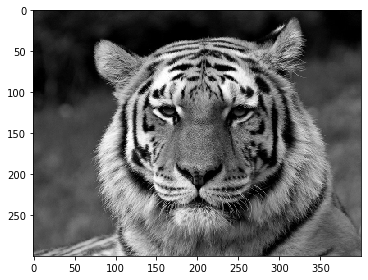

In [2]:
img = imread('images/tiger-gray-small.png')
imshow(img)

In [3]:
kernel = 5

/home/aldik/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


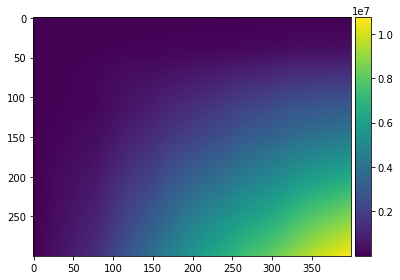

In [4]:
integral_img = integral_image(img)
imshow(integral_img)

In [5]:
y, x = img.shape
y, x

(300, 400)

In [6]:
new_img = np.full((y - kernel + 1, x - kernel + 1), -np.inf)

In [7]:
new_img.shape

(296, 396)

In [8]:
q = time()
for i in range(y - kernel + 1):
    starts = list(product([i], range(x - kernel + 1)))
    ends = list(product([i + kernel - 1], np.arange(x - kernel + 1) + kernel - 1))
    new_img[i] = integrate(integral_img, starts, ends) / 25
w = time()

In [42]:
print(w - q)

15.977608680725098


In [10]:
new_img.min()

0.0

In [9]:
new_img = np.clip(new_img, 0, 255)

In [10]:
new_img = new_img.astype('uint8')

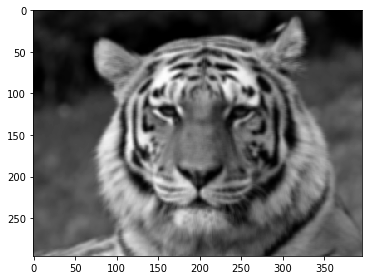

In [11]:
imshow(new_img)

In [9]:
new_img.shape

(296, 396)

In [ ]:
img

In [14]:
integrate(integral_img, (0,0), (4, 4))[0]

973.0

In [13]:
true_img = imread('images/box-tiger.png')

In [14]:
np.array_equal(true_img, new_img)

True